In [1]:
"""
Excercise the various types of matrics for binary classification (ROC, F1 Score, Accuracy). 


Kaggle. https://www.kaggle.com/c/titanic/data
Code is written by reference. https://developers.ascentnet.co.jp/2017/11/24/kaggle-process-review/
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# pd.set_option('display.max_rows', None)
train_df = pd.read_csv('./train.csv')  # training dataframe
test_df  = pd.read_csv('./test.csv')   # test dataframe
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


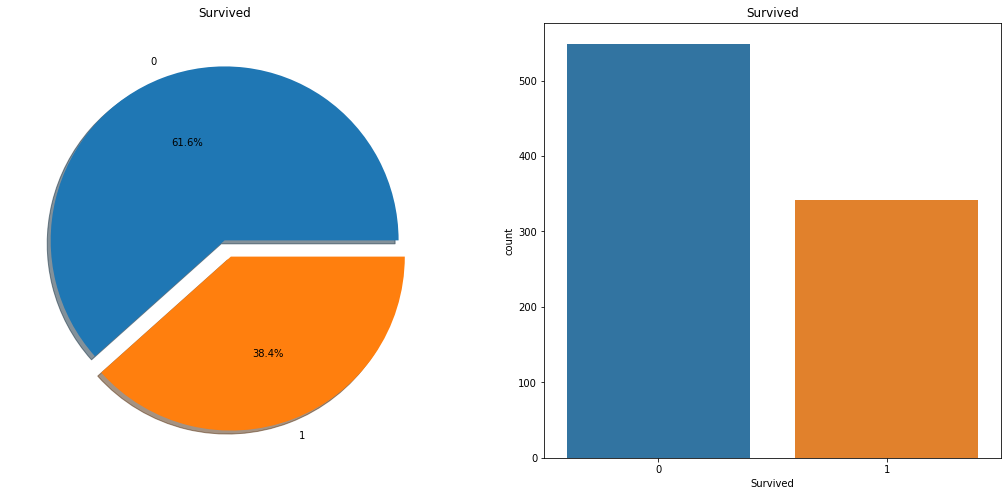

In [2]:
# Check whether data is imbalanced or not.

import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(1, 2, figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

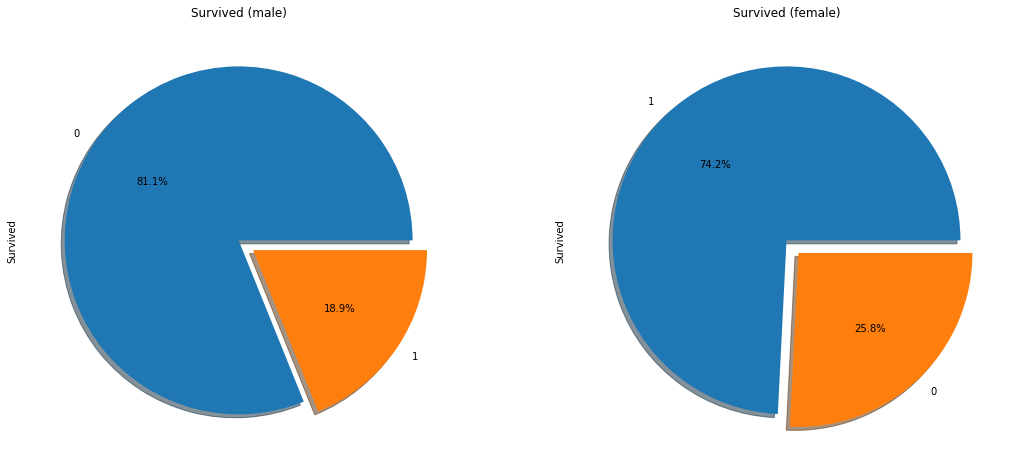

In [3]:
# Survival ratio according to sex. Survival ratio of women is higher than that of men. Maybe.. lady-first?

f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'][train_df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_df['Survived'][train_df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

In [4]:
# Survival ratio according to pclass. Survial ratio of pclass 1 is highest. 


pd.crosstab([train_df['Survived']],train_df['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


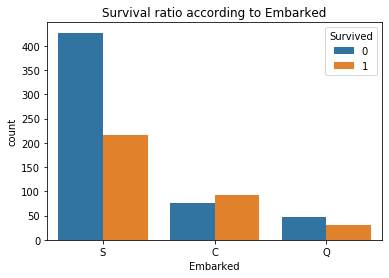

In [5]:
sns.countplot('Embarked',hue='Survived',data=train_df)
plt.title('Survival ratio according to Embarked')
plt.show()

In [6]:
surv_ratio_age = train_df.groupby('Age').mean()['Survived']
surv_ratio_age

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

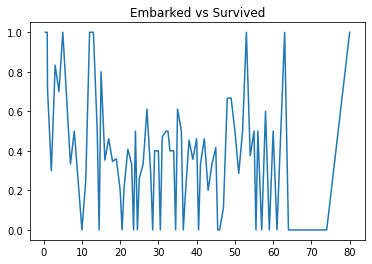

In [7]:
plt.plot(surv_ratio_age.index, surv_ratio_age)
plt.title('Embarked vs Survived')
plt.show()

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
def preprocessing(df):
    df.drop(['Cabin', 'Name', 'Ticket', 'Age'], axis=1, inplace=True)
    df.Sex.replace('male', 0, inplace=True)
    df.Sex.replace('female', 1, inplace=True)
    df.Embarked.replace('S', 0, inplace=True)
    df.Embarked.replace('C', 1, inplace=True)
    df.Embarked.replace('Q', 2, inplace=True)
    return df

before_len = len(train_df)
print(f"train_df's length before preprocessing: {before_len}")

train_df = preprocessing(train_df)
train_df.dropna(inplace=True)

after_len = len(train_df)
print(f"train_df's length after: {after_len}")
print(f"{before_len - after_len} rows are removed")

train_df's length before preprocessing: 891
train_df's length after: 889
2 rows are removed


In [11]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
test_df = preprocessing(test_df)
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].mean())
test_df

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892,3,0,0,0,7.8292,2
1,893,3,1,1,0,7.0000,0
2,894,2,0,0,0,9.6875,2
3,895,3,0,0,0,8.6625,0
4,896,3,1,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,0,0,0,8.0500,0
414,1306,1,1,0,0,108.9000,1
415,1307,3,0,0,0,7.2500,0
416,1308,3,0,0,0,8.0500,0


The accuracy of Val is 0.7584269662921348


C:\Users\codez\Anaconda3\envs\deepzero\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


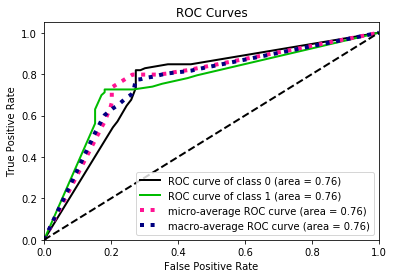

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

train_df, val_df = train_test_split(train_df, test_size=0.2,random_state=0)

target_col = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_X=train_df[target_col].values
train_Y=train_df['Survived'].values
val_X=val_df[target_col].values
val_Y=val_df['Survived'].values

scaler = StandardScaler()
scaler.fit(train_X)
tree_model = DecisionTreeClassifier()
tree_model.fit(scaler.transform(train_X), train_Y)
dt_prediction = tree_model.predict(scaler.transform(val_X))
print('The accuracy of Val is',metrics.accuracy_score(dt_prediction, val_Y))

# Install foloowing command: conda install -c conda-forge scikit-plot
import scikitplot as skplt
probs = tree_model.predict_proba(scaler.transform(val_X))
skplt.metrics.plot_roc_curve(val_Y, probs)
plt.show()

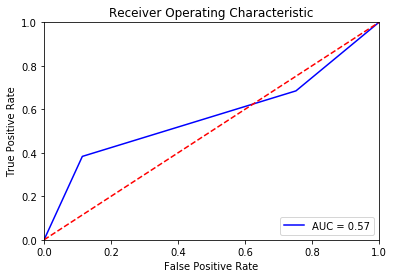

In [14]:
probs = tree_model.predict_proba(val_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(val_Y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

from sklearn.metrics import f1_score
print('The accuracy of Val is',f1_score(val_Y, dt_prediction))

The accuracy of Val is 0.6814814814814814


In [16]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
# predict test data with pre-trained tree model
test_X = test_df[target_col]
dt_prediction_result = tree_model.predict(test_X)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test_df["PassengerId"]).astype(int)
dt_solution = pd.DataFrame(dt_prediction_result, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
dt_solution.to_csv("solution.csv", index_label = ["PassengerId"]) 